<a href="https://colab.research.google.com/github/gautamkale/tensorflow-deep-learning/blob/main/conv2D_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten
from tensorflow.keras import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import pathlib
import matplotlib.image as impg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [4]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref= zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()



--2022-06-17 09:30:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   318MB/s    in 0.3s    

2022-06-17 09:30:33 (318 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [5]:
no_file= os.listdir("pizza_steak")

class_dir= pathlib.Path("pizza_steak/train")
classes=np.array(sorted([item.name for item in class_dir.glob("*")]))
print(f"{class_dir}   { classes}")

pizza_steak/train   ['pizza' 'steak']


In [6]:
def plot_image(pathdir,dirname):
  target_folder=pathdir+dirname
  random_image= random.sample(os.listdir(target_folder),1)
  print(random_image)

  img= impg.imread(target_folder+ "/" + random_image[0])
  plt.imshow(img)
  plt.title(dirname)
  plt.axis("off")
  return img


['225990.jpg']


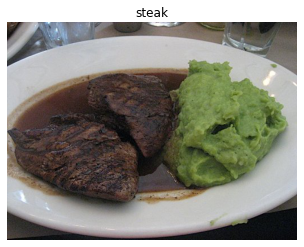

In [7]:
img =plot_image("pizza_steak/train/","steak")

In [8]:
tf.random.set_seed(42) 
train_datagen= ImageDataGenerator(rescale=1./255)
validation_datagen= ImageDataGenerator(rescale=1./255)
train_directory="pizza_steak/train"
test_directory="pizza_steak/test"
training_data=train_datagen.flow_from_directory(directory=train_directory, target_size=(224, 224),class_mode='binary', batch_size=32, seed=42)
test_data=train_datagen.flow_from_directory(directory=test_directory, target_size=(224, 224),  class_mode='binary', batch_size=32, seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
model4= Sequential ([
                     Conv2D(filters =10,
                            kernel_size=3,
                            strides = 1,
                            padding = "valid",
                            activation ="relu",
                            input_shape =(224,224,3)),
                     Conv2D(10,3,activation="relu"),
                     Conv2D(10,3,activation="relu"),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

In [10]:
model4.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
history =model4.fit(training_data,epochs=5,steps_per_epoch=len(training_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 237ms/step - loss: 0.8919 - accuracy: 0.6013 - val_loss: 0.5241 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4524 - accuracy: 0.7913 - val_loss: 0.3536 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3799 - accuracy: 0.8333 - val_loss: 0.3217 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3158 - accuracy: 0.8773 - val_loss: 0.3469 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.2345 - accuracy: 0.9160 - val_loss: 0.3646 - val_accuracy: 0.8360


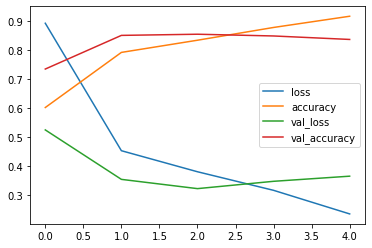

In [12]:
pd.DataFrame(history.history).plot()


In [13]:

def plot_history(history):
  loss= history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epoch= range(len(history.history['loss']))

  plt.plot(epoch,loss,label='training_loss')
  plt.plot(epoch,val_loss,label= 'value_loss')
  plt.xlabel('epochs')
  plt.title('loss')
  plt.legend()

  plt.figure()
  plt.plot(epoch, accuracy,label='training_accuracy')
  plt.plot(epoch,val_accuracy,label= 'val_accuracy')
  plt.xlabel('epochs')
  plt.title('accuracy')
  plt.legend()


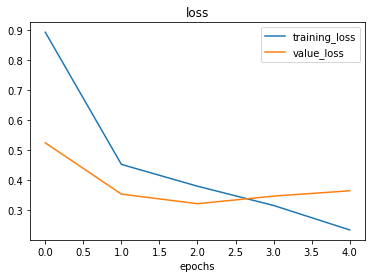

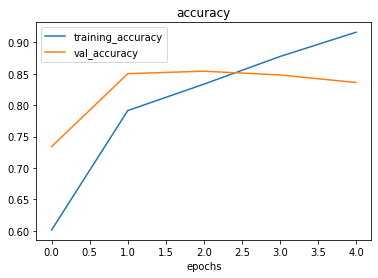

In [14]:
plot_history(history)

In [15]:
model5= Sequential ([
                     Conv2D(filters =10,
                            kernel_size=3,
                            strides = 1,
                            padding = "valid",
                            activation ="relu",
                            input_shape =(224,224,3)),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                       MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

In [16]:
model5.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

In [17]:
history5= model5.fit(training_data,epochs=5,steps_per_epoch=len(training_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 215ms/step - loss: 0.6126 - accuracy: 0.6820 - val_loss: 0.4820 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4922 - accuracy: 0.7753 - val_loss: 0.3824 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4184 - accuracy: 0.8147 - val_loss: 0.3543 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4053 - accuracy: 0.8193 - val_loss: 0.3311 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3670 - accuracy: 0.8427 - val_loss: 0.3135 - val_accuracy: 0.8800


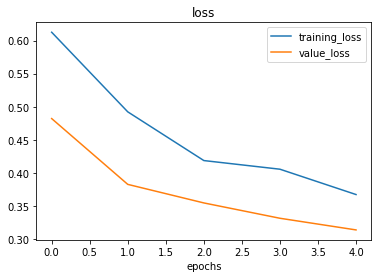

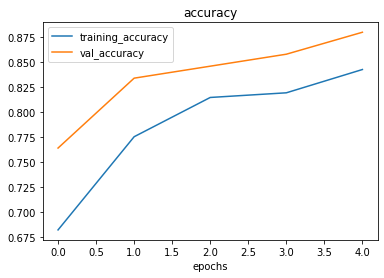

In [18]:
plot_history(history5)

In [19]:
train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                                 rotation_range= 0.2,
                                                 shear_range=0.2,
                                                 zoom_range=0.2,
                                                 width_shift_range=0.2,
                                                 height_shift_range=0.3,
                                                 horizontal_flip=True)

train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

In [20]:
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"
train_data_augmeted= train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),
                                                              batch_size=32,
                                                              class_mode='binary',
                                                              shuffle=False)
train_data= train_datagen.flow_from_directory(train_dir,target_size=(224,224),
                                                              batch_size=32,
                                                              class_mode='binary',
                                                              shuffle=False)

test_data= test_datagen.flow_from_directory(test_dir,target_size=(224,224),
                                                              batch_size=32,
                                                              class_mode='binary',
                                                              shuffle=False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
image, labels= train_data.next()
aug_image, aug_lables = train_data_augmeted.next()

(-0.5, 223.5, 223.5, -0.5)

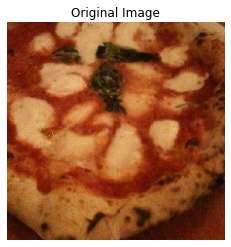

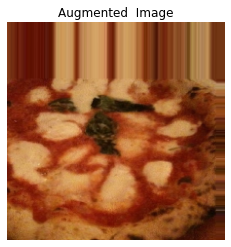

In [22]:
import random
random= random.randint(0,32)

plt.imshow(image[random])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()

plt.imshow(aug_image[random])
plt.title(f"Augmented  Image")
plt.axis(False)


In [23]:
train_data_augmeted[0][0].shape

(32, 224, 224, 3)

In [24]:
tf.version.VERSION

'2.8.2'

In [25]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmeted, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmeted),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 25s 527ms/step - loss: 0.8289 - accuracy: 0.4140 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 522ms/step - loss: 0.7035 - accuracy: 0.4927 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 25s 522ms/step - loss: 0.7003 - accuracy: 0.5347 - val_loss: 0.6854 - val_accuracy: 0.5180
Epoch 4/5
47/47 [==============================] - 25s 524ms/step - loss: 0.6906 - accuracy: 0.5660 - val_loss: 0.6689 - val_accuracy: 0.7400
Epoch 5/5
47/47 [==============================] - 25s 526ms/step - loss: 0.8046 - accuracy: 0.6160 - val_loss: 0.7013 - val_accuracy: 0.5000


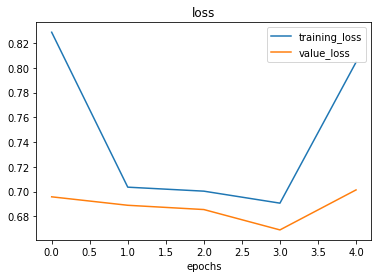

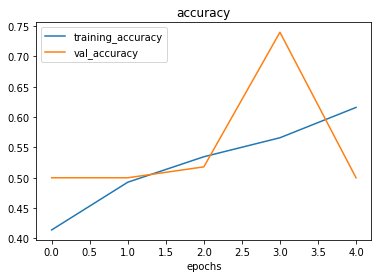

In [26]:
plot_history(history_6)

In [27]:
train_data_augmeted_shuffle= train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),
                                                              batch_size=32,
                                                              class_mode='binary',
                                                              shuffle=True)


Found 1500 images belonging to 2 classes.


In [28]:
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmeted_shuffle, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmeted_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 550ms/step - loss: 0.6505 - accuracy: 0.6093 - val_loss: 0.5329 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 24s 522ms/step - loss: 0.5774 - accuracy: 0.6780 - val_loss: 0.4428 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 24s 520ms/step - loss: 0.5119 - accuracy: 0.7620 - val_loss: 0.3691 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 25s 524ms/step - loss: 0.4808 - accuracy: 0.7720 - val_loss: 0.4319 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 25s 525ms/step - loss: 0.4641 - accuracy: 0.7880 - val_loss: 0.3450 - val_accuracy: 0.8520


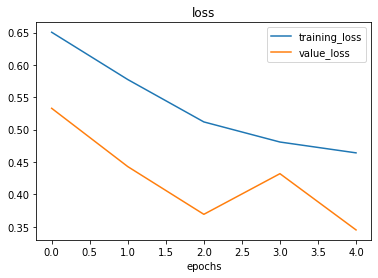

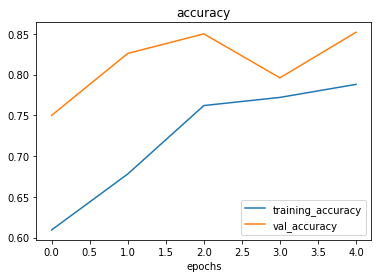

In [29]:
plot_history(history_7)

--2022-06-17 09:37:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-06-17 09:37:09 (33.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

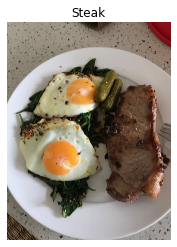

In [30]:
import matplotlib.image as mplib

!wget  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mplib.imread("03-steak.jpeg")

plt.imshow(steak)
plt.title("Steak")
plt.axis(False)


In [31]:
def image_resize(filename, img_size=224):
  img= tf.io.read_file(filename)
  img= tf.image.decode_image(img)
  img= tf.image.resize(img, size=[img_size,img_size])
  img=img/255.
  return img


In [32]:
steak_img =image_resize("03-steak.jpeg")

In [33]:
pred =model_7.predict(tf.expand_dims(steak_img,axis=0))

In [34]:
class_name = np.array(['pizza','steak'])
class_name

array(['pizza', 'steak'], dtype='<U5')

In [35]:
pred_class=class_name[int(tf.round(pred))]
pred_class

'steak'

--2022-06-17 09:37:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-06-17 09:37:12 (44.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



(-0.5, 3023.5, 4031.5, -0.5)

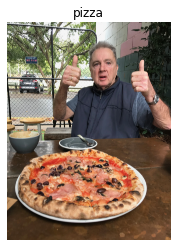

In [36]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza=mplib.imread("03-pizza-dad.jpeg")

plt.imshow(pizza)
plt.title("pizza")
plt.axis(False)


In [37]:
pizza= image_resize('03-pizza-dad.jpeg')

In [38]:
pred =model_7.predict(tf.expand_dims(pizza,axis=0))

pred_class=class_name[int(tf.round(pred))]
pred_class

'pizza'

In [39]:
##multi class classificaiton

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref= zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()


--2022-06-17 09:37:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 173.194.192.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   207MB/s    in 2.4s    

2022-06-17 09:37:16 (207 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [40]:
no_file= os.listdir("/content/10_food_classes_all_data")

class_dir= pathlib.Path("/content/10_food_classes_all_data/train/")
multi_classes=np.array(sorted([item.name for item in class_dir.glob("*")]))
print(f"{class_dir}   { multi_classes}")

/content/10_food_classes_all_data/train   ['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['854335.jpg']


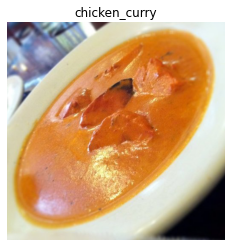

In [41]:
import random as random
img =plot_image(pathdir='/content/10_food_classes_all_data/train/',dirname=random.choice(multi_classes))

In [42]:
mutli_train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                                 rotation_range= 0.2,
                                                 shear_range=0.2,
                                                 zoom_range=0.2,
                                                 width_shift_range=0.2,
                                                 height_shift_range=0.3,
                                                 horizontal_flip=True)

mutli_train_datagen= ImageDataGenerator(rescale=1/255.)
mutli_test_datagen= ImageDataGenerator(rescale=1/255.)

mutli_train_dir="/content/10_food_classes_all_data/train"
mutli_test_dir="/content/10_food_classes_all_data/test"
train_data_augmeted= train_datagen_augmented.flow_from_directory(mutli_train_dir,target_size=(224,224),
                                                              batch_size=32,
                                                              class_mode='categorical',)
mutli_train_data= train_datagen.flow_from_directory(mutli_train_dir,target_size=(224,224),
                                                              batch_size=32,
                                                              class_mode='categorical')

mutli_test_data= mutli_test_datagen.flow_from_directory(mutli_test_dir,target_size=(224,224),
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [43]:
model_8= Sequential([
             Conv2D(10,3, input_shape=(224,224,3)),
             Activation(activation= 'relu'),
             Conv2D(10,3,activation='relu'),       
             MaxPool2D(),
             Conv2D(10,3,activation='relu'),       
             Conv2D(10,3,activation='relu'),    
             MaxPool2D(),
             Flatten(),
             Dense(10,activation='softmax')

])

model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(mutli_train_data, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(mutli_train_data),
                        validation_data=mutli_test_data,
                        validation_steps=len(mutli_test_data))

Epoch 1/5
235/235 [==============================] - 51s 215ms/step - loss: 2.1188 - accuracy: 0.2276 - val_loss: 1.9773 - val_accuracy: 0.2736
Epoch 2/5
235/235 [==============================] - 50s 214ms/step - loss: 1.8586 - accuracy: 0.3547 - val_loss: 1.8762 - val_accuracy: 0.3304
Epoch 3/5
235/235 [==============================] - 50s 215ms/step - loss: 1.5942 - accuracy: 0.4624 - val_loss: 1.9169 - val_accuracy: 0.3360
Epoch 4/5
235/235 [==============================] - 50s 213ms/step - loss: 1.1470 - accuracy: 0.6220 - val_loss: 2.2065 - val_accuracy: 0.3152
Epoch 5/5
235/235 [==============================] - 50s 213ms/step - loss: 0.6114 - accuracy: 0.8073 - val_loss: 2.7714 - val_accuracy: 0.2968


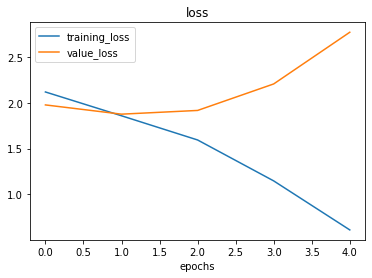

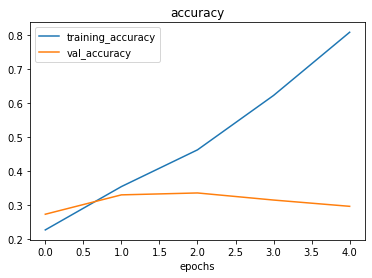

In [44]:
plot_history(history_8)

In [45]:
model_9= Sequential([
             Conv2D(10,3, input_shape=(224,224,3)),
             Activation(activation= 'relu'),
             Conv2D(10,3,activation='relu'),       
             MaxPool2D(),
             Flatten(),
             Dense(10,activation='softmax')

])

model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_9 = model_9.fit(mutli_train_data, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(mutli_train_data),
                        validation_data=mutli_test_data,
                        validation_steps=len(mutli_test_data))

Epoch 1/5
235/235 [==============================] - 50s 212ms/step - loss: 2.1433 - accuracy: 0.2284 - val_loss: 1.9991 - val_accuracy: 0.2936
Epoch 2/5
235/235 [==============================] - 51s 215ms/step - loss: 1.5513 - accuracy: 0.4940 - val_loss: 1.9851 - val_accuracy: 0.3316
Epoch 3/5
235/235 [==============================] - 50s 211ms/step - loss: 0.6576 - accuracy: 0.8223 - val_loss: 2.3732 - val_accuracy: 0.2892
Epoch 4/5
235/235 [==============================] - 50s 214ms/step - loss: 0.1426 - accuracy: 0.9749 - val_loss: 2.9644 - val_accuracy: 0.2888
Epoch 5/5
235/235 [==============================] - 50s 211ms/step - loss: 0.0286 - accuracy: 0.9973 - val_loss: 3.4035 - val_accuracy: 0.2964


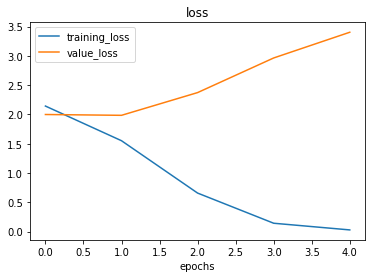

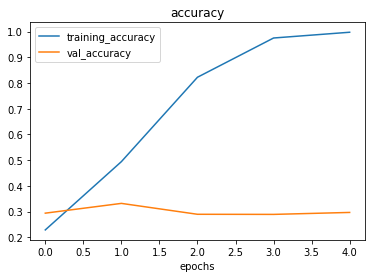

In [47]:
plot_history(history_9)

In [49]:
model_10= Sequential([
             Conv2D(10,3, input_shape=(224,224,3)),
             Activation(activation= 'relu'),
             Conv2D(10,3,activation='relu'),       
             MaxPool2D(),
             Conv2D(10,3,activation='relu'),       
             Conv2D(10,3,activation='relu'),    
             MaxPool2D(),
             Flatten(),
             Dense(10,activation='softmax')

])

model_10.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_10 = model_10.fit(train_data_augmeted, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmeted),
                        validation_data=mutli_test_data,
                        validation_steps=len(mutli_test_data))

Epoch 1/5
235/235 [==============================] - 129s 548ms/step - loss: 2.2484 - accuracy: 0.1620 - val_loss: 2.1221 - val_accuracy: 0.2604
Epoch 2/5
235/235 [==============================] - 124s 530ms/step - loss: 2.1523 - accuracy: 0.2197 - val_loss: 2.0073 - val_accuracy: 0.2808
Epoch 3/5
235/235 [==============================] - 125s 533ms/step - loss: 2.1200 - accuracy: 0.2360 - val_loss: 2.0166 - val_accuracy: 0.2784
Epoch 4/5
235/235 [==============================] - 124s 528ms/step - loss: 2.0877 - accuracy: 0.2587 - val_loss: 1.9436 - val_accuracy: 0.3336
Epoch 5/5
235/235 [==============================] - 125s 532ms/step - loss: 2.0553 - accuracy: 0.2795 - val_loss: 1.8336 - val_accuracy: 0.3792


In [61]:
multi_classes

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [62]:
pizza= image_resize('/content/03-steak.jpeg')
print(pred)
pred =model_10.predict(tf.expand_dims(pizza,axis=0))
if(len(pred[0])>1):
 pred_class=multi_classes[tf.argmax(pred[0])]
else:
  pred_class=multi_classes[int(tf.round(pred))]
pred_class

[[0.02583238 0.05545365 0.0475824  0.13717273 0.1617026  0.10901165
  0.05455449 0.07614902 0.25605547 0.07648557]]


'steak'

In [63]:
model_10.save("model_10_multiclass")

INFO:tensorflow:Assets written to: model_10_multiclass/assets
